## 1. Importing the libraries

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style ="whitegrid", color_codes=True)

## 2. Importing the dataset

In [ ]:
lines = pd.read_table('/content/french.txt', names=['english', 'french'])
data=lines
lines = lines[:8000]
lines.sample(5)

,english,french
7536,I went fishing.,Je suis allé pêcher.
7625,I'm dependable.,Je suis fiable.
5150,I quit my job.,J'ai quitté mon boulot.
2565,That's hers.,C'est le sien.
6595,Come back home.,Rentre à la maison.


In [ ]:
data_french=['French' for i in data['french']]
data_eng=['English' for j in data['english']]
data_fin=[]
for i in data_french:
  data_fin.append(i)
for j in data_eng:
  data_fin.append(j)
dat=pd.DataFrame()
dat['Nation']=data_fin

## 3. Graphical Analysis

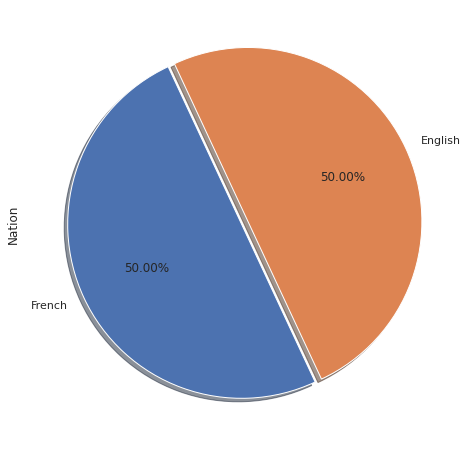

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
dat['Nation'].value_counts().plot(kind='pie',autopct='%.2f%%',shadow=True,startangle=115,explode=(0,0.04))
plt.show()
plt.savefig('1_plot')

In [ ]:
import plotly 
import plotly.express as px
import plotly.graph_objects as go
import os

if not os.path.exists("images"):
    os.mkdir("images")
fig = go.Figure()
fig.add_trace(go.Scatter(x=lines['english'], 
                         y=lines['french'],
                         mode='lines',
                         name='language',
                         opacity=0.8,
                         line=dict(color='black', width=1)
                        ))

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black',
                 title='english'
                )

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black',
                 title='french'
                )

# Set figure title
fig.update_layout(title=dict(text="english words", 
                             font=dict(color='black')))

fig.show()

## 4. Data cleaning and preparation 

In [ ]:
lines.shape

(8000, 2)

In [ ]:
lines.english = lines.english.apply(lambda x: x.lower())
lines.french = lines.french.apply(lambda x: x.lower())

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import re
lines.english = lines.english.apply(lambda x: re.sub("'", '', x)).apply(lambda x: re.sub(",", 'COMMA', x))
lines.french = lines.french.apply(lambda x: re.sub("'", '', x)).apply(lambda x: re.sub(",", 'COMMA', x))

## 5. Filtering data and mining

In [ ]:
import string
exclude = set(string.punctuation)
lines.english = lines.english.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
lines.french = lines.french.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [ ]:
from string import digits
remove_digits = str.maketrans('', '', digits)
lines.english = lines.english.apply(lambda x: x.translate(remove_digits))
lines.french = lines.french.apply(lambda x: x.translate(remove_digits))

In [ ]:
lines.sample(5)

,english,french
1134,i fixed it,je lai réparée
7976,lets have fun,amusonsnous
1388,let him go,laissezle partir
6264,weve arrived,nous sommes arrivés
6434,youre grumpy,tu es grognon


## 6. Creating dataframe for exploring

In [ ]:
# applying start and end tokens in french sentences
lines.french = lines.french.apply(lambda x: 'START_' + ' ' + x + ' ' + '_END')
lines.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,english,french
0,go,START_ va _END
1,run,START_ cours _END
2,run,START_ courez _END
3,wow,START_ ça alors _END
4,fire,START_ au feu _END


## 7. Creating a dictionary of french words with vocabulary

In [ ]:
# collecting all unique english words to create a vocabulary
all_english_words = set()
for eng in lines.english:
  for word in eng.split():
    if word not in all_english_words:
      all_english_words.add(word)

# collecting all unique french words to create a vocabulary
all_french_words = set()
for fre in lines.french:
  for word in fre.split():
    if word not in all_french_words:
      all_french_words.add(word)

In [ ]:
# printing length of words in each language
print('length of english words: ', len(all_english_words))
print('length of french words: ', len(all_french_words))

length of english words:  1882
length of french words:  3987


In [ ]:
# getting maximum sentence length of english sentences
length_list = []
for l in lines.english:
  length_list.append(len(l.split(' ')))

max_input_length = np.max(length_list)
print('max_input_length: ', max_input_length)

max_input_length:  5


In [ ]:
# getting maximum sentence length of french sentences
length_list = []
for l in lines.french:
  length_list.append(len(l.split(' ')))

max_output_length = np.max(length_list)
print('max_output_length: ', max_output_length)

max_output_length:  12


## 8. Tokenizing and vectorizing

In [ ]:
# making a list of all input and output words and sorting them out
input_words = sorted(list(all_english_words))
output_words = sorted(list(all_french_words))
print('all input words: ', input_words)
print('all output words: ', output_words)

#getting total tokens(words) from input and output
num_encoder_tokens = len(all_english_words)
num_decoder_tokens = len(all_french_words)
print('encoder tokens: ', num_encoder_tokens)
print('decoder tokens: ', num_encoder_tokens)

all input words:  ['COMMA', 'a', 'abandon', 'aboard', 'about', 'above', 'absent', 'accept', 'ached', 'act', 'active', 'actor', 'adaptable', 'addicted', 'admire', 'adopted', 'adorable', 'adult', 'adults', 'advice', 'afraid', 'after', 'afternoon', 'again', 'against', 'age', 'agent', 'agree', 'agreed', 'agrees', 'ahead', 'aim', 'aint', 'air', 'alert', 'alive', 'all', 'allow', 'almost', 'alone', 'along', 'already', 'also', 'always', 'am', 'amazed', 'ambitious', 'ambush', 'american', 'amnesia', 'amuse', 'amused', 'an', 'and', 'angry', 'animals', 'annoy', 'annoying', 'another', 'answer', 'answers', 'anxious', 'any', 'anybody', 'anyone', 'anything', 'anyway', 'apart', 'apologize', 'apologized', 'apples', 'approve', 'approves', 'arabic', 'arabs', 'are', 'arent', 'argue', 'arguing', 'arm', 'armed', 'around', 'arrested', 'arrived', 'art', 'artist', 'as', 'asap', 'ashamed', 'asian', 'aside', 'ask', 'asked', 'asleep', 'assume', 'astonished', 'at', 'ate', 'attack', 'attacked', 'attend', 'attentive'

In [ ]:
# getting index for words as these indexes will behave as words for machine interactions
input_token_index = dict([(word,i) for i,word in enumerate(input_words)])
output_token_index = dict([(word,i) for i,word in enumerate(output_words)])

print('input token index: ', input_token_index)
print('output token index: ', output_token_index)

input token index:  {'COMMA': 0, 'a': 1, 'abandon': 2, 'aboard': 3, 'about': 4, 'above': 5, 'absent': 6, 'accept': 7, 'ached': 8, 'act': 9, 'active': 10, 'actor': 11, 'adaptable': 12, 'addicted': 13, 'admire': 14, 'adopted': 15, 'adorable': 16, 'adult': 17, 'adults': 18, 'advice': 19, 'afraid': 20, 'after': 21, 'afternoon': 22, 'again': 23, 'against': 24, 'age': 25, 'agent': 26, 'agree': 27, 'agreed': 28, 'agrees': 29, 'ahead': 30, 'aim': 31, 'aint': 32, 'air': 33, 'alert': 34, 'alive': 35, 'all': 36, 'allow': 37, 'almost': 38, 'alone': 39, 'along': 40, 'already': 41, 'also': 42, 'always': 43, 'am': 44, 'amazed': 45, 'ambitious': 46, 'ambush': 47, 'american': 48, 'amnesia': 49, 'amuse': 50, 'amused': 51, 'an': 52, 'and': 53, 'angry': 54, 'animals': 55, 'annoy': 56, 'annoying': 57, 'another': 58, 'answer': 59, 'answers': 60, 'anxious': 61, 'any': 62, 'anybody': 63, 'anyone': 64, 'anything': 65, 'anyway': 66, 'apart': 67, 'apologize': 68, 'apologized': 69, 'apples': 70, 'approve': 71, 'a

In [ ]:
# creating arrays of input and output data
encoder_input_data = np.zeros((len(lines.english), max_input_length), dtype='float32')
decoder_input_data = np.zeros((len(lines.french), max_output_length), dtype='float32')

#one hot encoding the target data as Dense layer only gives one output through softmax layer
decoder_target_data = np.zeros((len(lines.french), max_output_length, num_decoder_tokens))

In [ ]:
print(encoder_input_data.shape)
print(decoder_input_data.shape)
print(decoder_target_data.shape)

(8000, 5)
(8000, 12)
(8000, 12, 3987)


## 9. Creating decoders and encoders for test and train sets

In [ ]:
# putting all the integer values in input, output data and target data
for i,(input_text, output_text) in enumerate(zip(lines.english, lines.french)):
  for t, word in enumerate(input_text.split()):
    encoder_input_data[i,t] = input_token_index[word]
  for t,word in enumerate(output_text.split()):
    decoder_input_data[i,t] = output_token_index[word]
    # as decoder target data is ahead of decoder input data, it will not include start_ character(which will be given to decoder model at prediction)
    if t > 0:
      decoder_target_data[i,t-1,output_token_index[word]] = 1

In [ ]:
print("encoder input data: ", encoder_input_data[1])
print('decoder input data: ', decoder_input_data[1])
print('decoder target data: ',decoder_target_data[1])
print('shape of sample decoder target data: ', decoder_target_data[1].shape)

encoder input data:  [1352.    0.    0.    0.    0.]
decoder input data:  [  0. 769.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
decoder target data:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of sample decoder target data:  (12, 3987)


## 10. Applying deep learning RNN

In [ ]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [ ]:
# setting hyperparameters
embedding_size = 120
lstm_dim = 324

In [ ]:
# building model for training stage
#encoder model

encoder_inputs = Input(shape=(None,))
en_x = Embedding(num_encoder_tokens, embedding_size)(encoder_inputs)
encoder = LSTM(lstm_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(en_x)
encoder_states = [state_h, state_c]

In [ ]:
# decoder model

decoder_inputs = Input(shape=(None,))
final_dex = Embedding(num_decoder_tokens, embedding_size)(decoder_inputs)

decoder_lstm = LSTM(lstm_dim, return_sequences=True, return_state=True)

decoder_outputs, _, _ = decoder_lstm(final_dex, initial_state=encoder_states)

decoder_dense = Dense(num_decoder_tokens, activation='softmax') 

decoder_outputs = decoder_dense(decoder_outputs)


## 11. Model creation and Training

In [ ]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [ ]:
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, None, 120)    225840      ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, None, 120)    478440      ['input_2[0][0]']                
                                                                                              

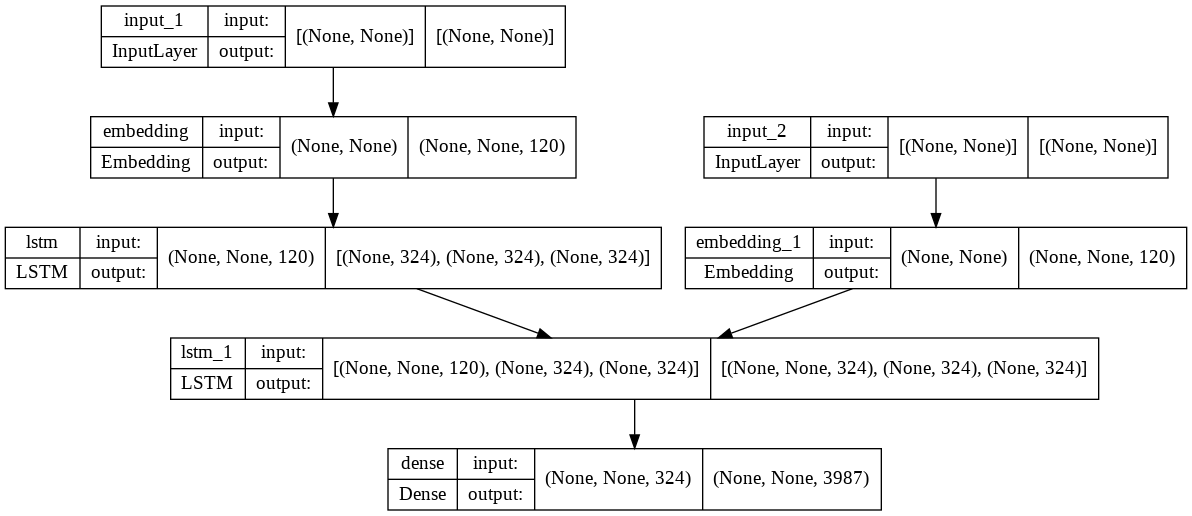

In [ ]:
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
r = model.fit([encoder_input_data, decoder_input_data], decoder_target_data, batch_size=64, epochs=200, steps_per_epoch=500, validation_split=0.10)

Epoch 1/200
500/500 [==============================] - 22s 22ms/step - loss: 1.7597 - accuracy: 0.1066 - val_loss: 2.0468 - val_accuracy: 0.1404
Epoch 2/200
500/500 [==============================] - 10s 20ms/step - loss: 1.5026 - accuracy: 0.1308 - val_loss: 1.9145 - val_accuracy: 0.1476
Epoch 3/200
500/500 [==============================] - 10s 20ms/step - loss: 1.3155 - accuracy: 0.1497 - val_loss: 1.8380 - val_accuracy: 0.1640
Epoch 4/200
500/500 [==============================] - 10s 20ms/step - loss: 1.1786 - accuracy: 0.1613 - val_loss: 1.8015 - val_accuracy: 0.1685
Epoch 5/200
500/500 [==============================] - 10s 20ms/step - loss: 1.0774 - accuracy: 0.1702 - val_loss: 1.7800 - val_accuracy: 0.1731
Epoch 6/200
500/500 [==============================] - 10s 20ms/step - loss: 0.9963 - accuracy: 0.1774 - val_loss: 1.7757 - val_accuracy: 0.1843
Epoch 7/200
500/500 [==============================] - 10s 21ms/step - loss: 0.9361 - accuracy: 0.1839 - val_loss: 1.7779 - val_ac

500/500 [==============================] - 3s 5ms/step - loss: 0.2934 - accuracy: 0.2639 - val_loss: 2.7918 - val_accuracy: 0.1639


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 120)         225840    
                                                                 
 lstm (LSTM)                 [(None, 324),             576720    
                              (None, 324),                       
                              (None, 324)]                       
                                                                 
Total params: 802,560
Trainable params: 802,560
Non-trainable params: 0
_________________________________________________________________


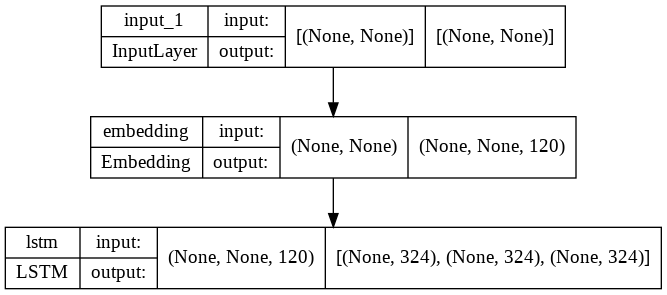

In [ ]:
#Inference Stage

#encoder model
encoder_model = Model(encoder_inputs, encoder_states)
encoder_model.summary()
plot_model(encoder_model, to_file='encode_model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.save_weights('model.h5')

## 12. Prediction and translation

In [ ]:
#decoder model
decoder_state_input_h = Input(shape=(lstm_dim,))
decoder_state_input_c = Input(shape=(lstm_dim,))
decoder_state_inputs = [decoder_state_input_h, decoder_state_input_c]

final_dex2 = Embedding(num_decoder_tokens, embedding_size)(decoder_inputs)

decoder_outputs2, state_h2, state_c2 = decoder_lstm(final_dex2, initial_state=decoder_state_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2)

decoder_model = Model([decoder_inputs] + decoder_state_inputs, [decoder_outputs2] + decoder_states2)

In [ ]:
# reversing the word index dictionary to get words from index values
reverse_input_char_index = dict((i,char) for char, i in input_token_index.items())
reverse_output_char_index = dict((i,char) for char, i in output_token_index.items())
print(reverse_input_char_index)
print(reverse_output_char_index)

{0: 'COMMA', 1: 'a', 2: 'abandon', 3: 'aboard', 4: 'about', 5: 'above', 6: 'absent', 7: 'accept', 8: 'ached', 9: 'act', 10: 'active', 11: 'actor', 12: 'adaptable', 13: 'addicted', 14: 'admire', 15: 'adopted', 16: 'adorable', 17: 'adult', 18: 'adults', 19: 'advice', 20: 'afraid', 21: 'after', 22: 'afternoon', 23: 'again', 24: 'against', 25: 'age', 26: 'agent', 27: 'agree', 28: 'agreed', 29: 'agrees', 30: 'ahead', 31: 'aim', 32: 'aint', 33: 'air', 34: 'alert', 35: 'alive', 36: 'all', 37: 'allow', 38: 'almost', 39: 'alone', 40: 'along', 41: 'already', 42: 'also', 43: 'always', 44: 'am', 45: 'amazed', 46: 'ambitious', 47: 'ambush', 48: 'american', 49: 'amnesia', 50: 'amuse', 51: 'amused', 52: 'an', 53: 'and', 54: 'angry', 55: 'animals', 56: 'annoy', 57: 'annoying', 58: 'another', 59: 'answer', 60: 'answers', 61: 'anxious', 62: 'any', 63: 'anybody', 64: 'anyone', 65: 'anything', 66: 'anyway', 67: 'apart', 68: 'apologize', 69: 'apologized', 70: 'apples', 71: 'approve', 72: 'approves', 73: 'a

In [ ]:
# function to predict translation
def decode_seq(input_seq):
  state_values = encoder_model.predict(input_seq)

  target_seq = np.zeros((1,1))

  target_seq[0,0] = output_token_index['START_']

  stop_condition = False
  decoded_sentence = ''

  while not stop_condition:
    output_tokens, h, c = decoder_model.predict([target_seq] + state_values)

    sampled_token_index = np.argmax(output_tokens[0,-1,:])
    sampled_char = reverse_output_char_index[sampled_token_index]

    decoded_sentence += ' ' + sampled_char

    if(sampled_char == '_END' or len(decoded_sentence) > 52):
      stop_condition = True

    target_seq = np.zeros((1,1))
    target_seq[0,0] = sampled_token_index

    state_values = [h,c] 

  return decoded_sentence

## 13. Outputs

In [ ]:
# testing the model for a sample from existing data
for seq_index in [1234, 4356, 4565, 34, 2345, 7656]:
  input_seq = encoder_input_data[seq_index:seq_index+1]
  decoded_sentence = decode_seq(input_seq)
  print('----')
  print('Input_sentence: ', lines.english[seq_index:seq_index+1])
  print('decoded sentence: ', decoded_sentence)

----
Input_sentence:  1234    i wrote it
Name: english, dtype: object
decoded sentence:   je l’ai vous vous vous vous vous vous vous vous vous
----
Input_sentence:  4356    youre funny
Name: english, dtype: object
decoded sentence:   regardetil regardetil regardetil vous vous vous vous
----
Input_sentence:  4565    do you get it
Name: english, dtype: object
decoded sentence:   fumezvous pas pas pas pas vous vous vous vous vous vous
----
Input_sentence:  34    got it
Name: english, dtype: object
decoded sentence:   tenezvous impossible vous vous vous vous vous vous vous
----
Input_sentence:  2345    is tom well
Name: english, dtype: object
decoded sentence:   estce atil que pas pas vous vous vous vous vous vous
----
Input_sentence:  7656    im interested
Name: english, dtype: object
decoded sentence:   il dégage vous vous vous vous vous vous vous vous vous
